In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
plt.style.use('ggplot')

<h1>Question 1</h1>

In [2]:
df = pd.read_csv("CoffeePrice.csv", header = None)
df.columns = ["month", "price"]

month = df.month
price = df.price

Raw Data Plot

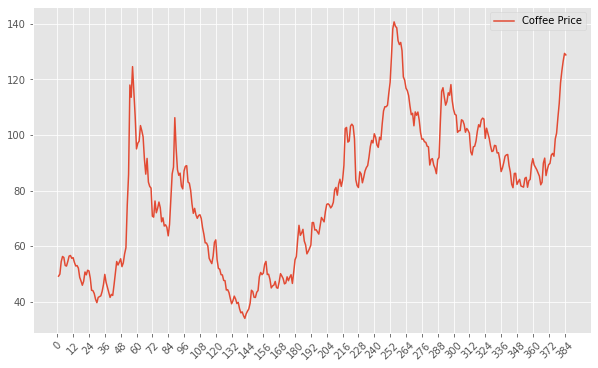

In [3]:
fig, ax = plt.subplots(figsize= (10,6))
ax.plot(month, price, label = "Coffee Price")
ax.legend()
ax.set_xticks([12*i for i in range(int(len(price)/12) + 1)])
for label in ax.get_xticklabels():
    label.set_rotation(45)
plt.show()

Error Functions

In [4]:
def MAE(sales, forecast):
    error = sales - forecast
    return np.mean(np.abs(error))
def MAPE(sales, forecast):
    error = sales - forecast
    return np.mean(np.abs(error / sales))
def RMSE(sales, forecast):
    error = sales - forecast
    return np.sqrt(np.mean(np.square(error)))

Naive Forecast with Errors

In [5]:
naive_forecast = np.array([price[i-1] for i in range(1,len(price))])
print("Naive Forecast MAE from 1991 to 2020:", MAE(price[12:372], naive_forecast[11:371]))
print("Naive Forecast MAPE from 1991 to 2020:", MAPE(price[12:372], naive_forecast[11:371]))
print("Naive Forecast RMSE from 1991 to 2020:", RMSE(price[12:372], naive_forecast[11:371]))

Naive Forecast MAE from 1991 to 2020: 2.7447940745555557
Naive Forecast MAPE from 1991 to 2020: 0.03563979274636223
Naive Forecast RMSE from 1991 to 2020: 4.13839665488288


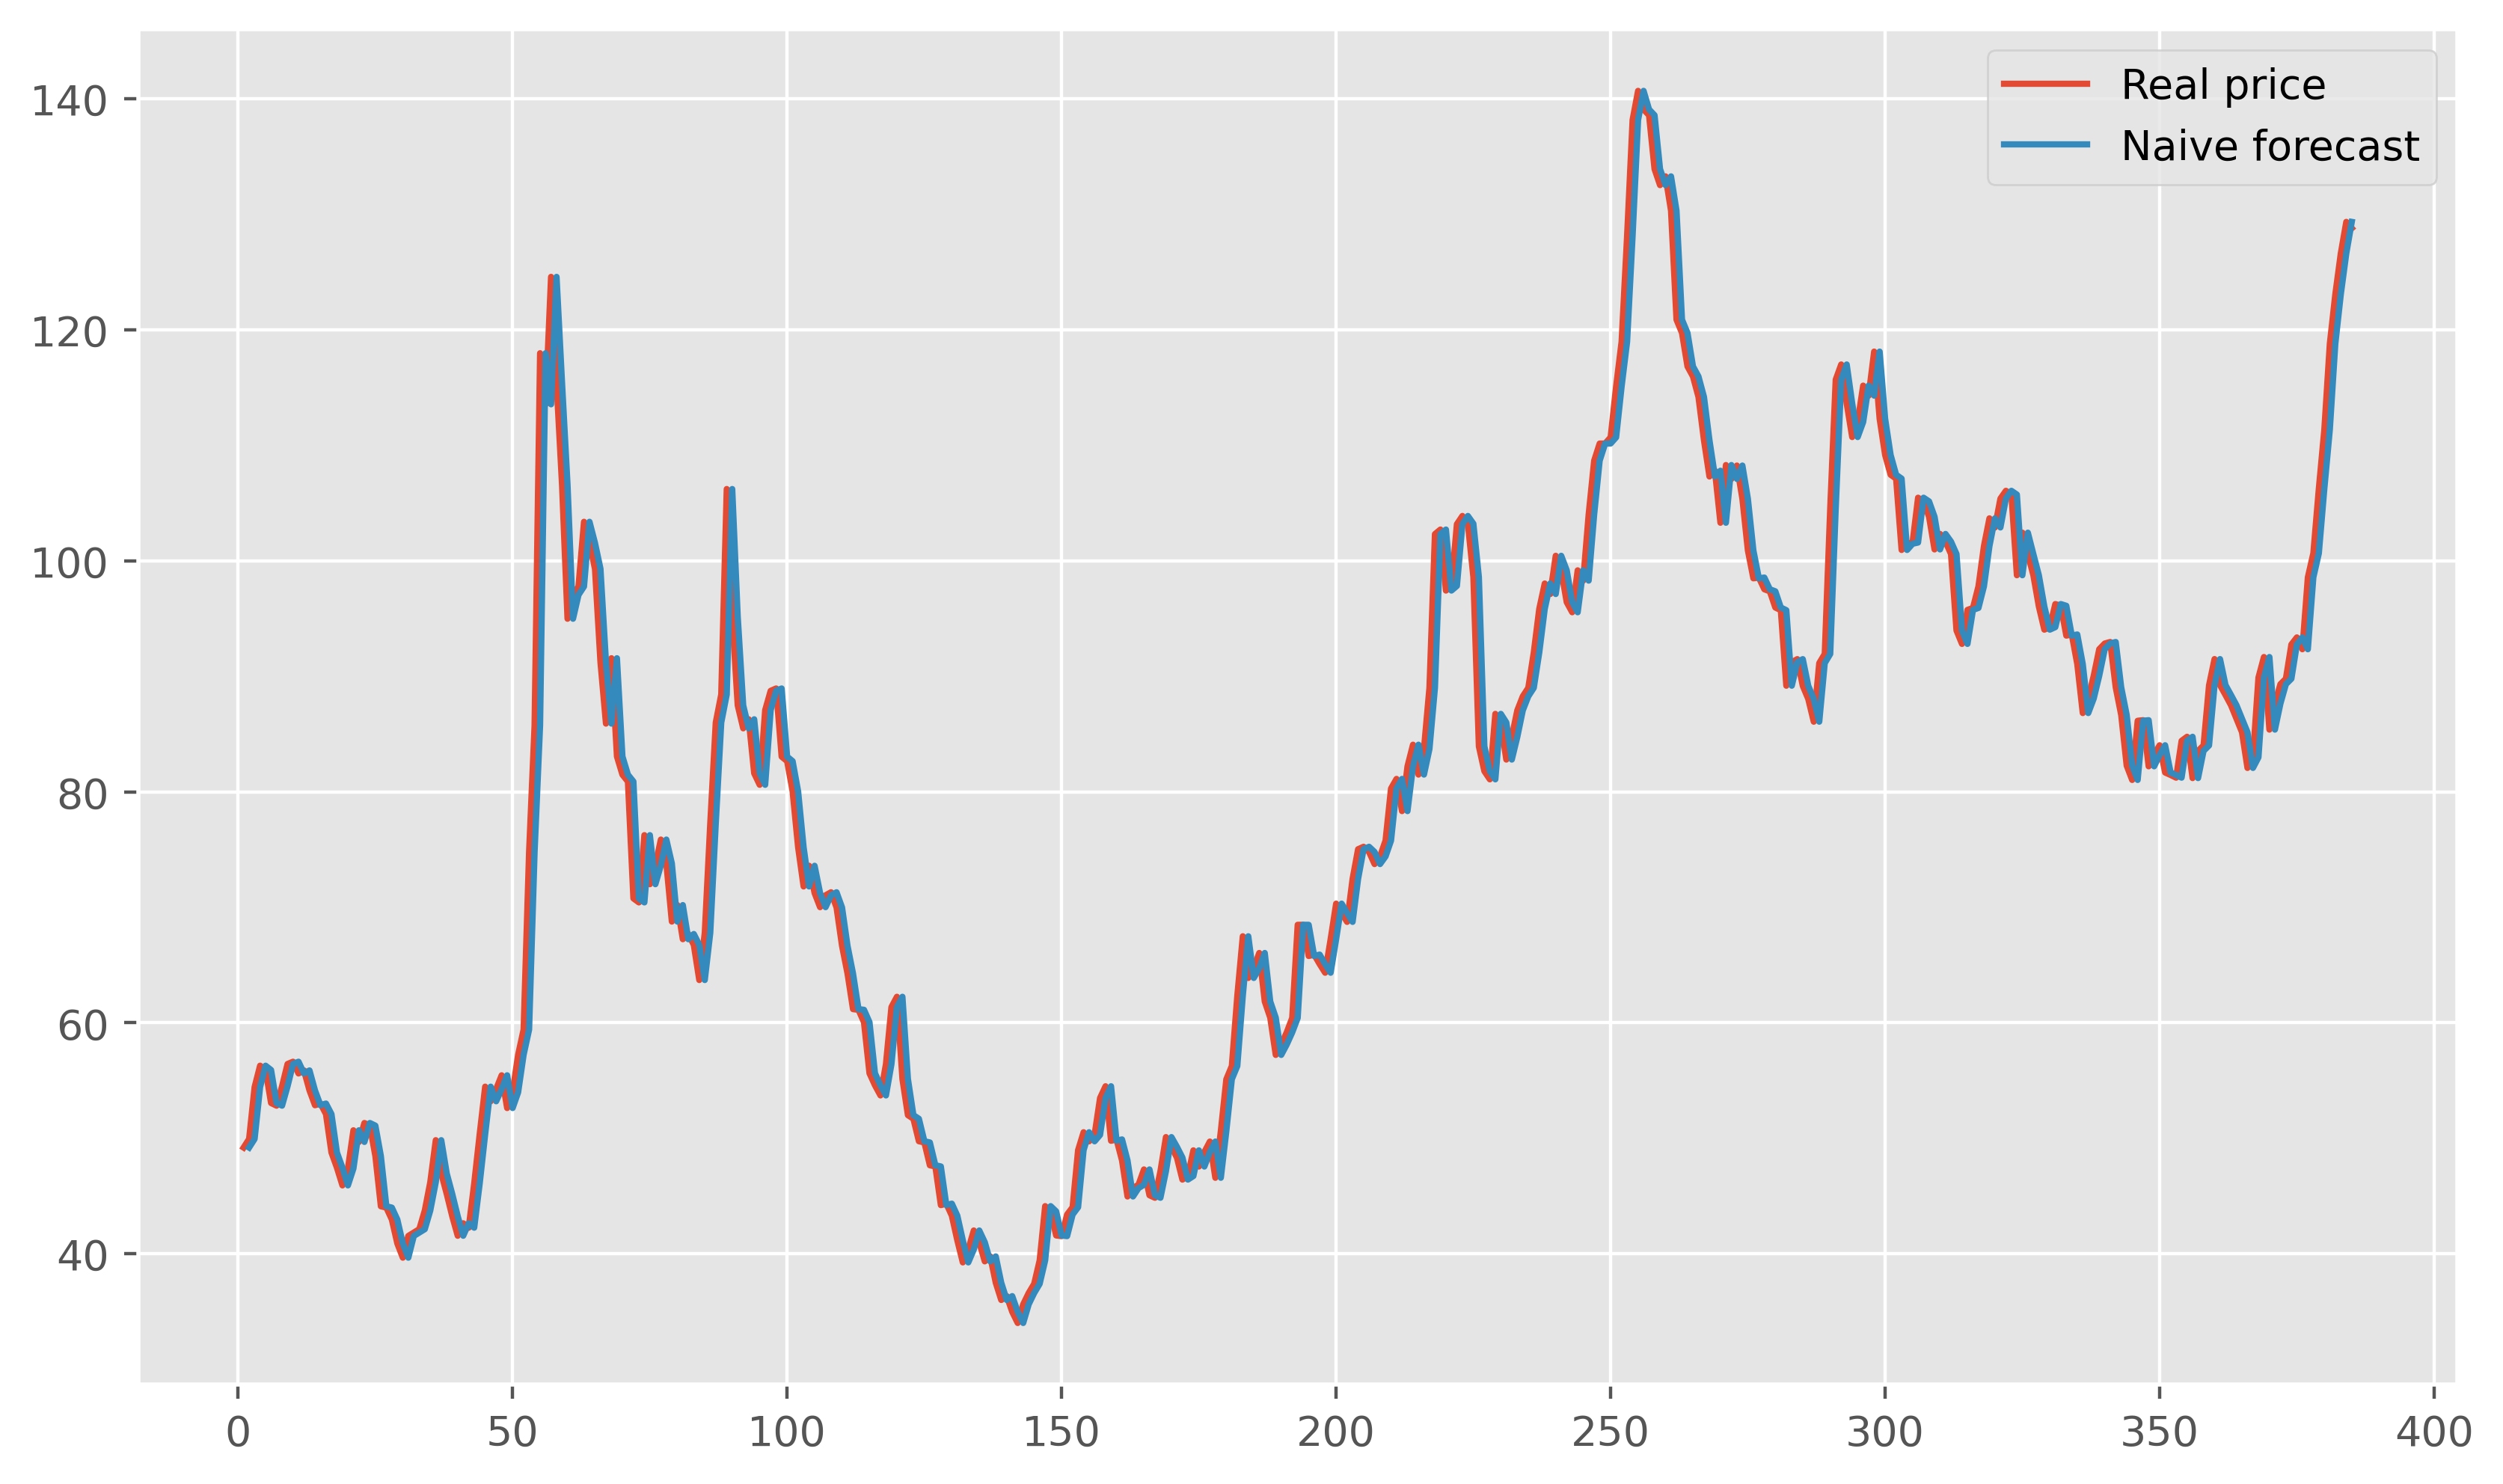

In [6]:
fig, ax = plt.subplots(figsize = (10,6), dpi = 400)
ax.plot(month, price, label = "Real price")
ax.plot(month[1:], naive_forecast, label = "Naive forecast")
ax.legend()
plt.show()

Five Moving Average Forecast with Errors

In [7]:
five_ma_forecast = np.array([(price[i-5]+price[i-4]+price[i-3]
                              +price[i-2]+price[i-1])/5 
                             for i in range(5,len(price))])
print("Five MA Forecast MAE from 1991 to 2020:", MAE(price[12:372], five_ma_forecast[7:367]))
print("Five MA Forecast MAPE from 1991 to 2020:", MAPE(price[12:372], five_ma_forecast[7:367]))
print("Five MA Forecast RMSE from 1991 to 2020:", RMSE(price[12:372], five_ma_forecast[7:367]))

Five MA Forecast MAE from 1991 to 2020: 4.961328926305556
Five MA Forecast MAPE from 1991 to 2020: 0.06356983921661971
Five MA Forecast RMSE from 1991 to 2020: 7.363141715664006


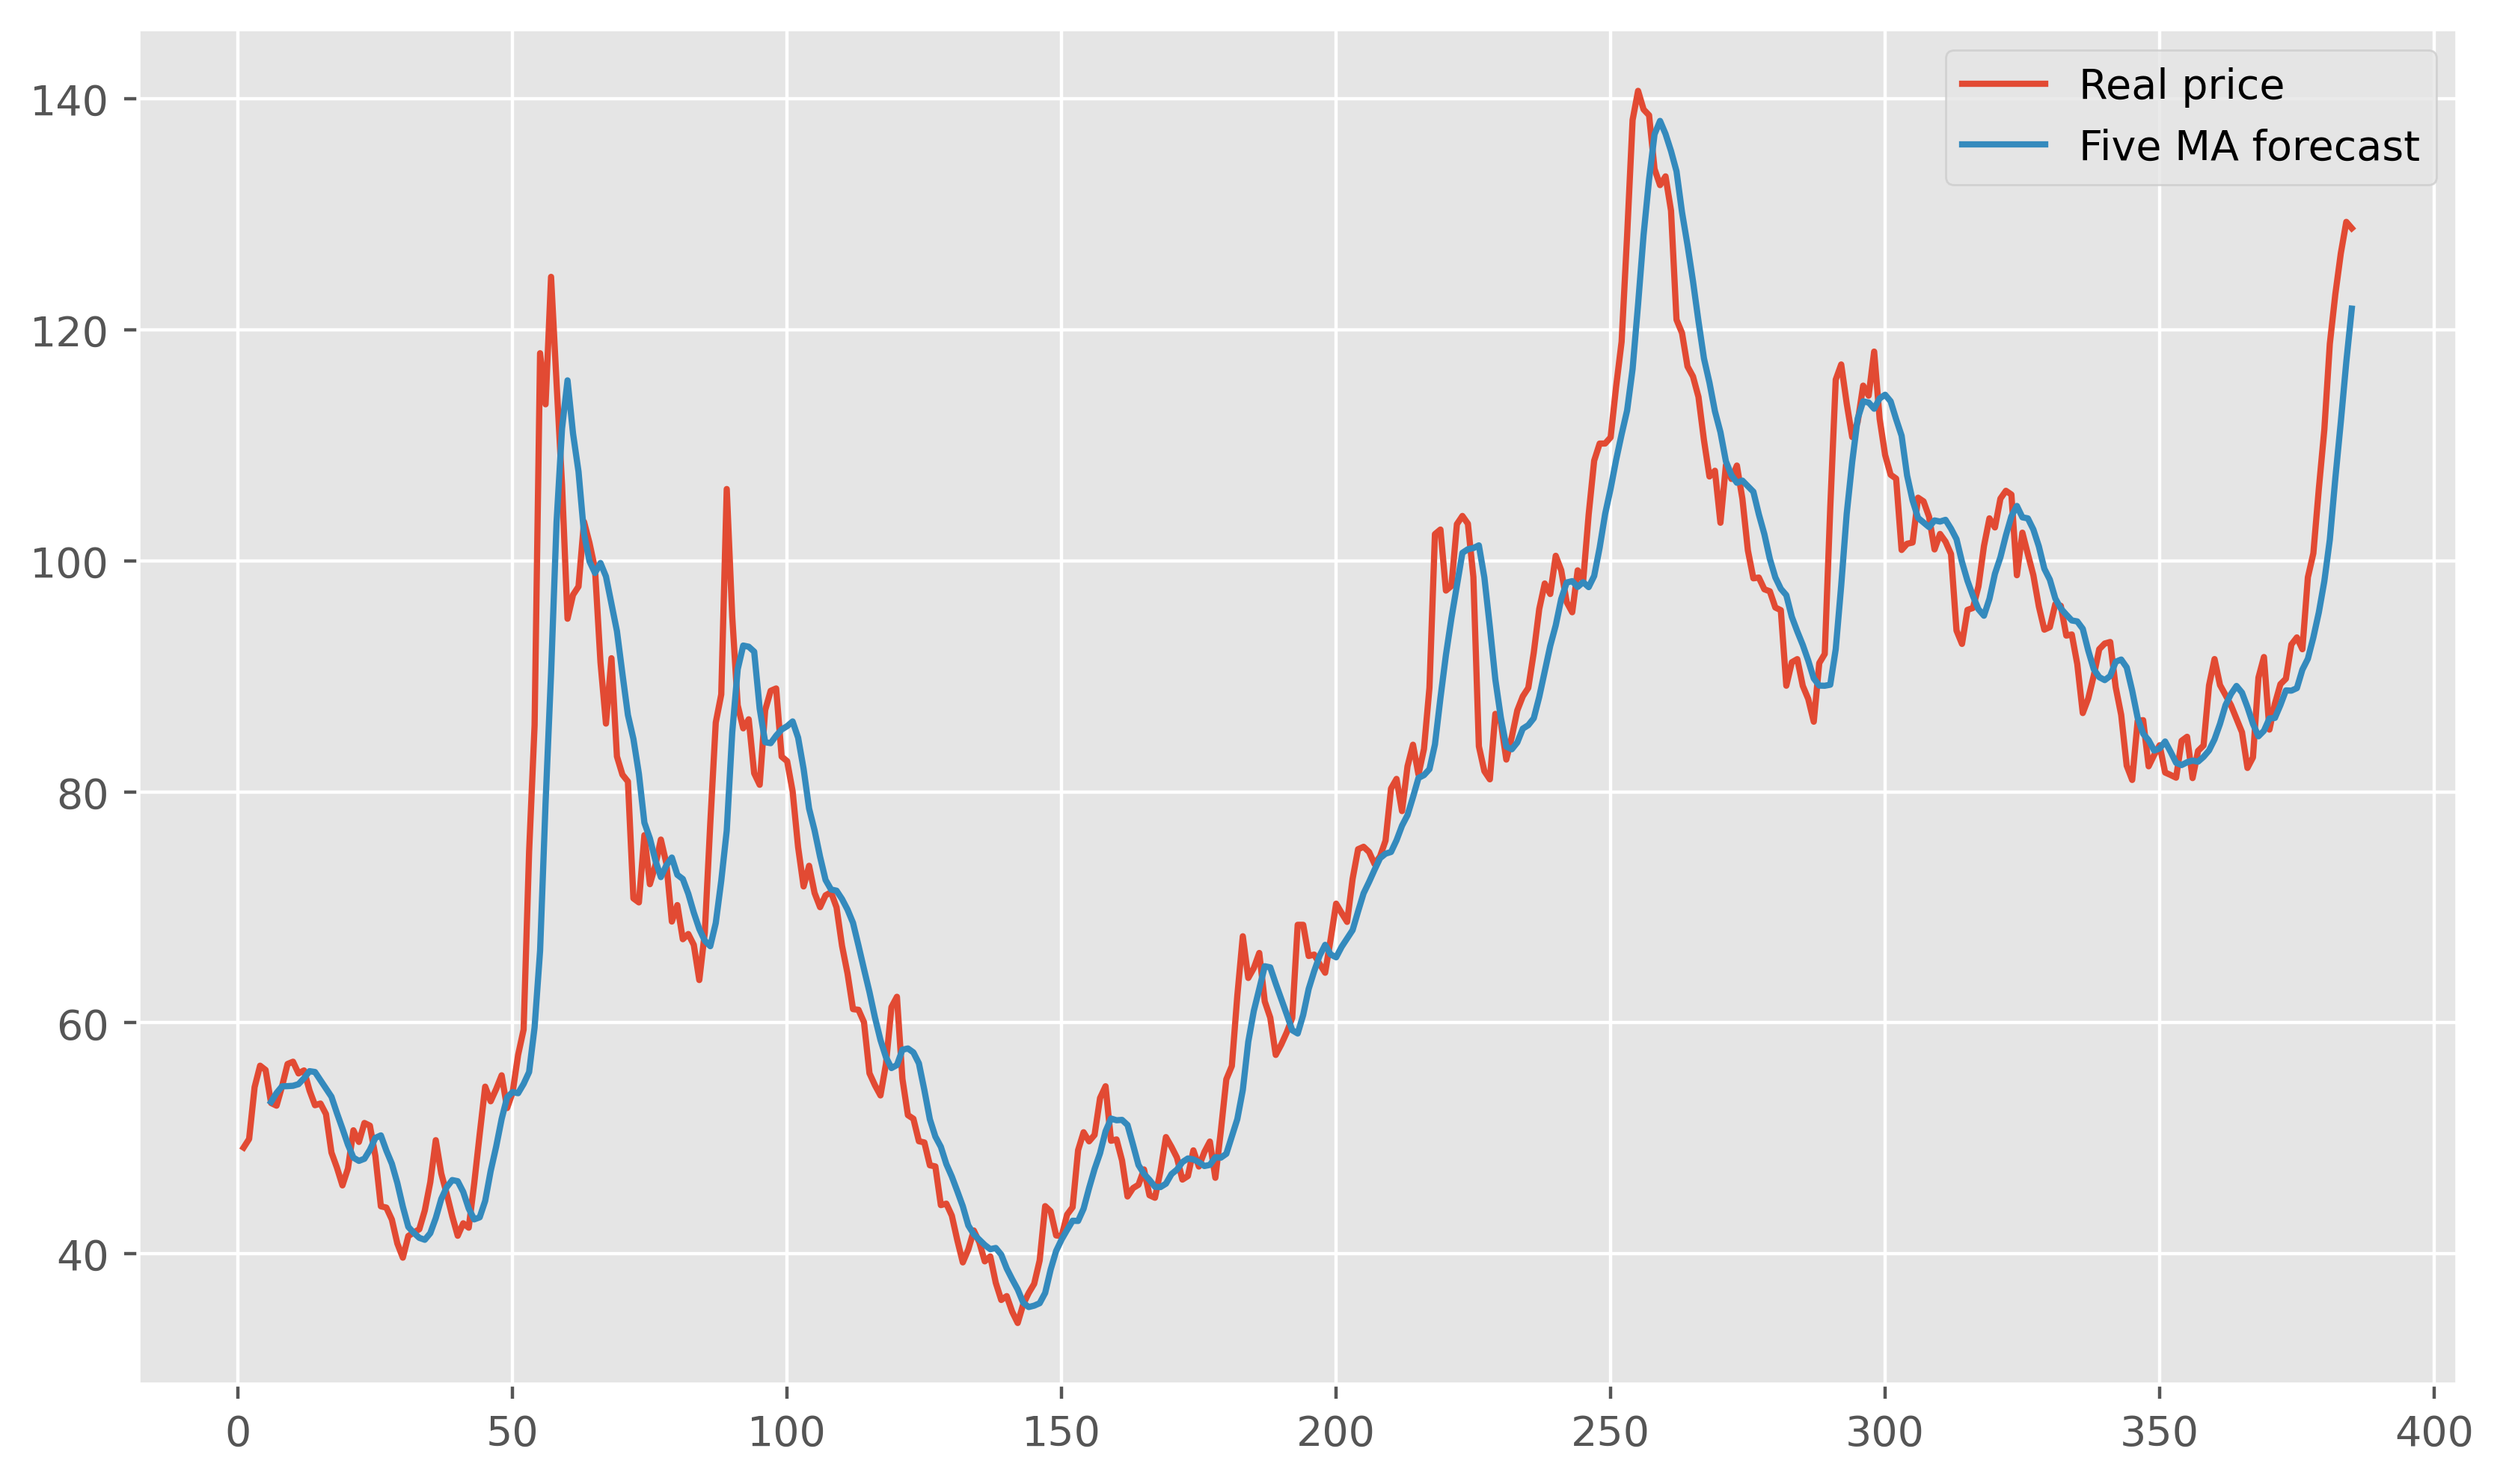

In [8]:
fig, ax = plt.subplots(figsize = (10,6), dpi = 400)
ax.plot(month, price, label = "Real price")
ax.plot(month[5:], five_ma_forecast, label = "Five MA forecast")
ax.legend()
plt.show()

In [9]:
confidence = 0.95 ## Confidence for our prediction intervals

Lower and Upper Bounds for Five MA Forecast

In [10]:
difference = st.norm.ppf((1+confidence)/2) * RMSE(price[12:372], five_ma_forecast[7:367])
five_ma_forecast_lower = five_ma_forecast - difference
five_ma_forecast_upper = five_ma_forecast + difference

Parameter Optimization for ES

In [11]:
es_RMSE = {}

for j in range(10):
    alpha = 0.1*(j+1)
    es_forecast = np.zeros(len(price))
    es_forecast[0] = price[0]
    for i in range(1, len(price)):
        es_forecast[i] = alpha * price[i-1] + (1-alpha) * es_forecast[i-1]
    es_RMSE[alpha] = RMSE(price[12:372], es_forecast[12:372])
    
es_RMSE = {k: v for k, v in sorted(es_RMSE.items(), key=lambda item: item[1])}
alpha_star = list(es_RMSE.keys())[0]
print(alpha_star)

1.0


In [12]:
es_forecast = np.zeros(len(price))
es_forecast[0] = price[0]
for i in range(1, len(price)):
    es_forecast[i] = alpha_star * price[i-1] + (1-alpha_star) * es_forecast[i-1]

print("ES Forecast MAE from 1991 to 2020:", MAE(price[12:372], es_forecast[12:372]))
print("ES Forecast MAPE from 1991 to 2020:", MAPE(price[12:372], es_forecast[12:372]))
print("ES Forecast RMSE from 1991 to 2020:", RMSE(price[12:372], es_forecast[12:372]))

ES Forecast MAE from 1991 to 2020: 2.7447940745555557
ES Forecast MAPE from 1991 to 2020: 0.03563979274636223
ES Forecast RMSE from 1991 to 2020: 4.13839665488288


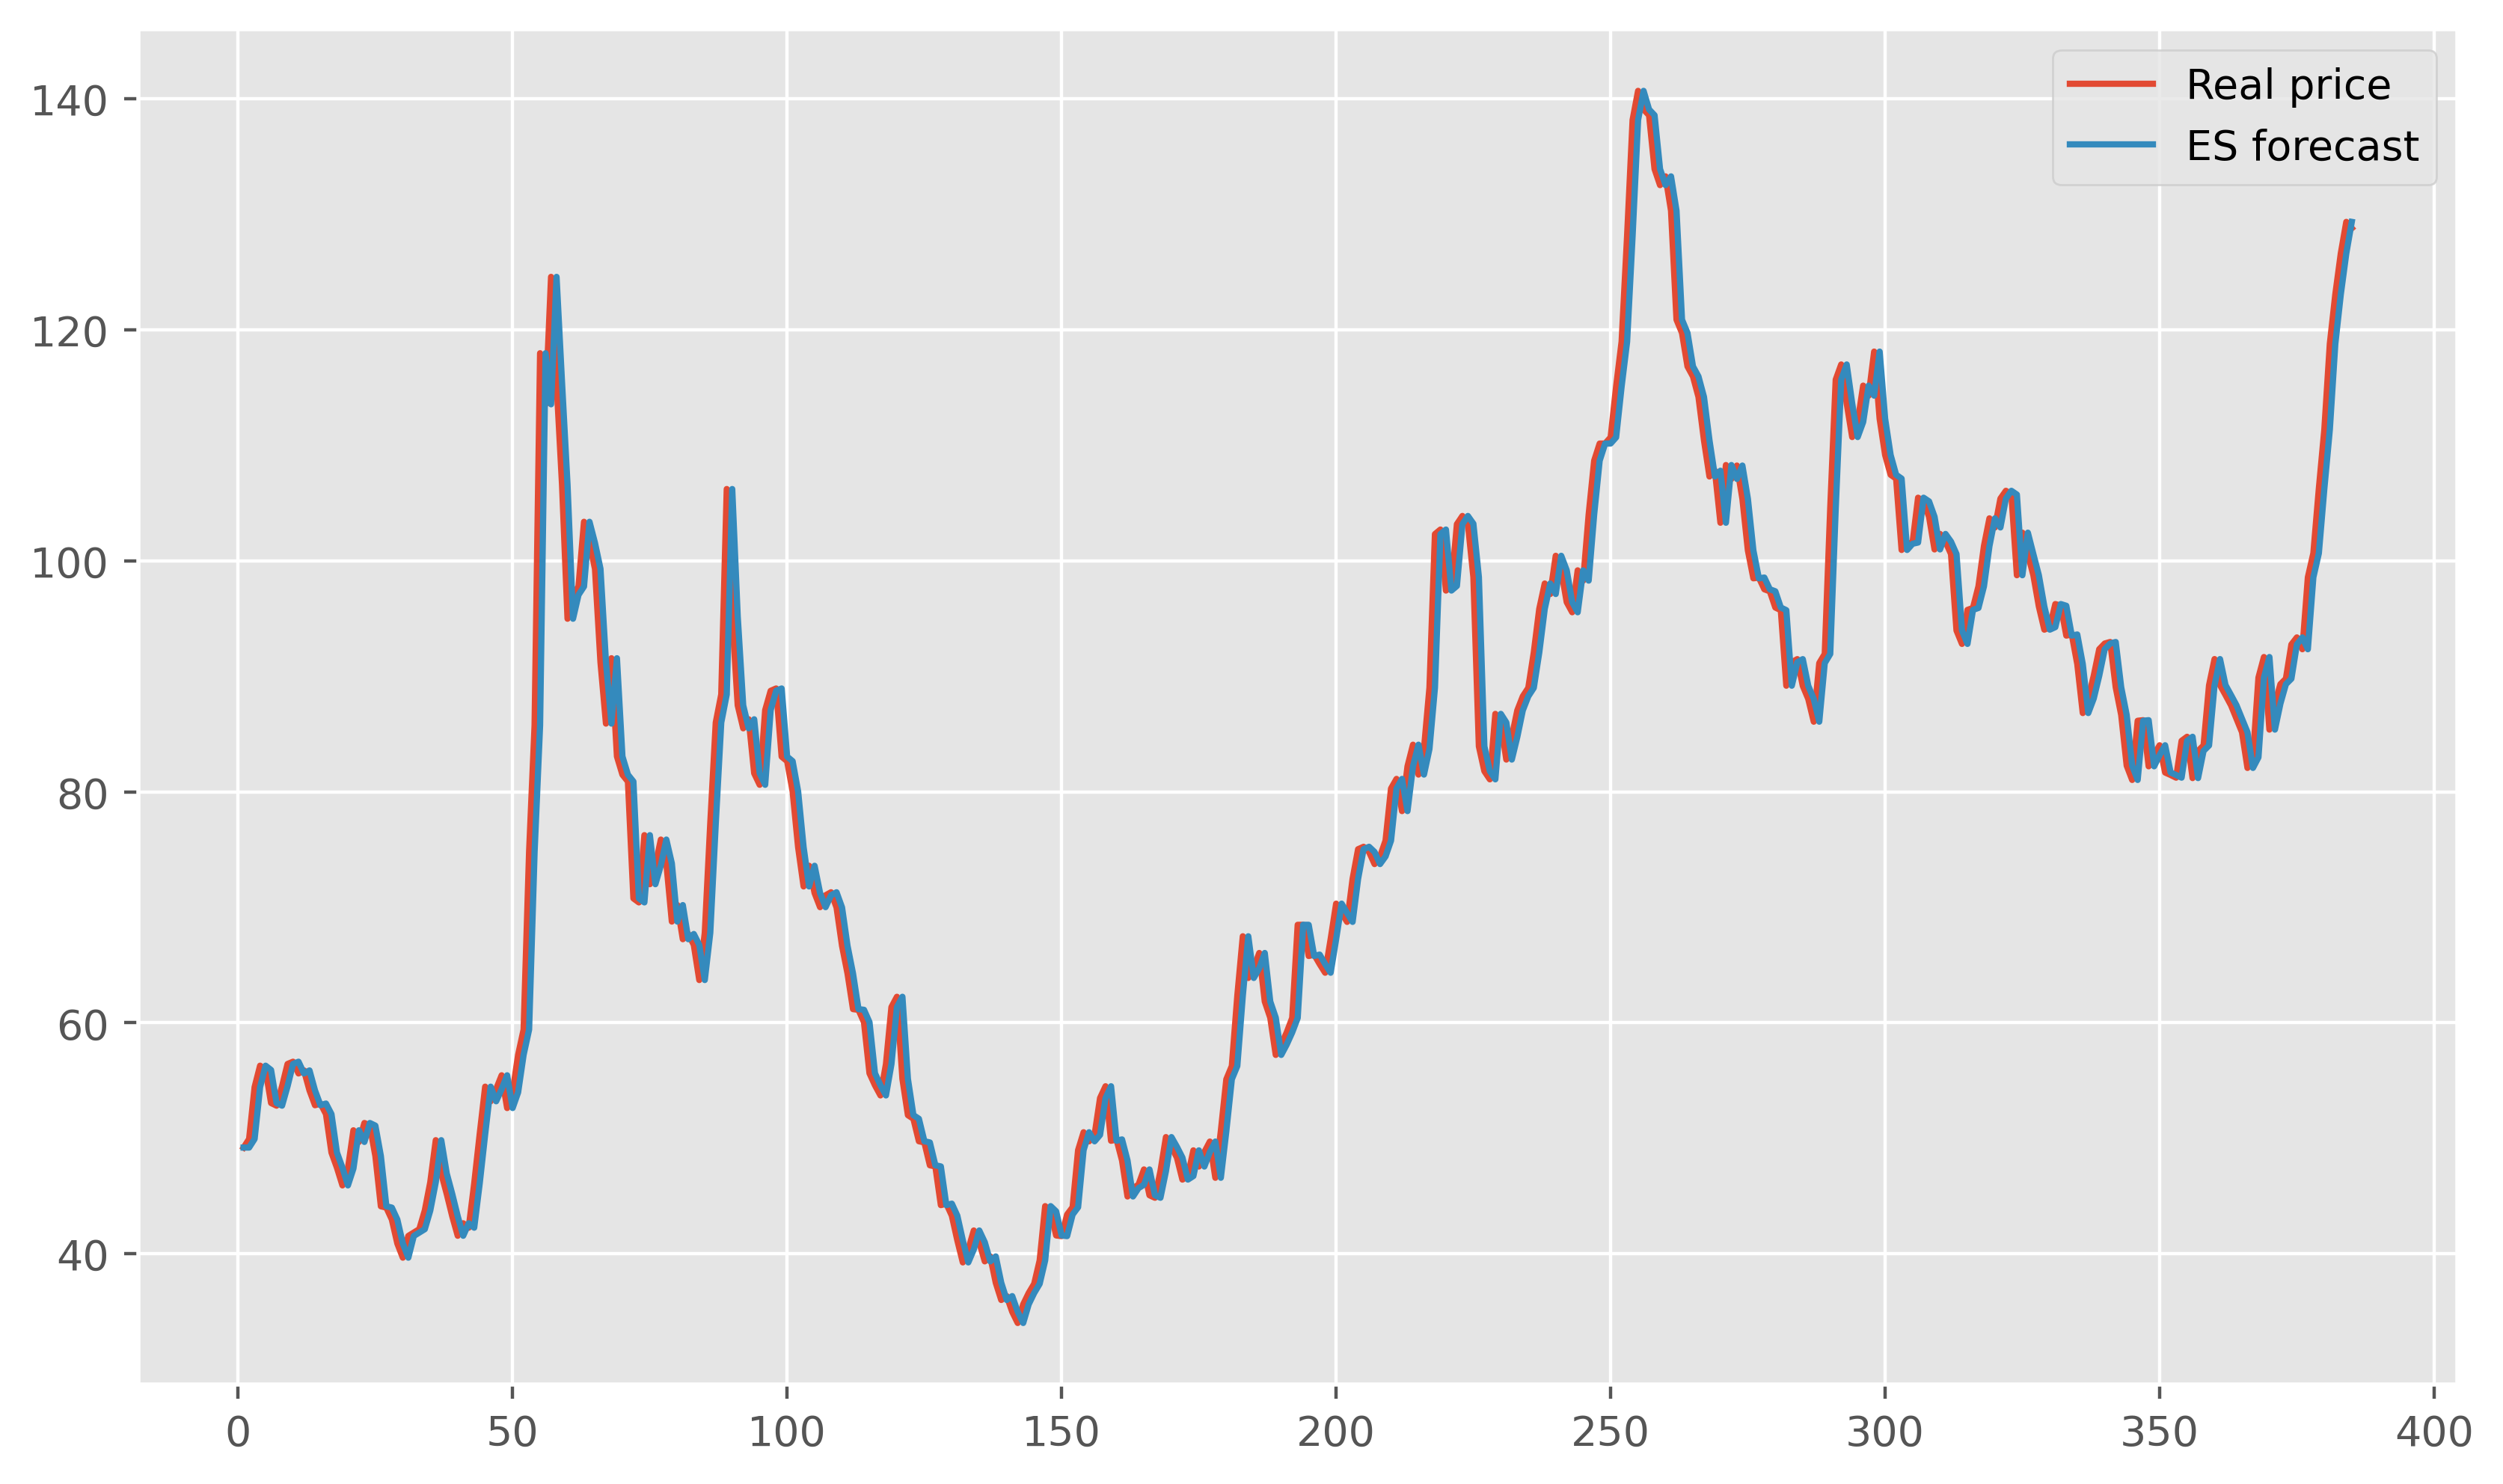

In [13]:
fig, ax = plt.subplots(figsize = (10,6), dpi = 400)
ax.plot(month, price, label = "Real price")
ax.plot(month, es_forecast, label = "ES forecast")
ax.legend()
plt.show()

Lower and Upper Bounds for Five ES Forecast

In [14]:
difference = st.norm.ppf((1+confidence)/2) * RMSE(price[12:372], es_forecast[12:372])
es_forecast_lower = es_forecast - difference
es_forecast_upper = es_forecast + difference

Naive Forecast with trend and Errors

In [15]:
naive_forecast_with_trend = np.array([price[i-1]+price[i-2]-price[i-3] for i in range(3,len(price))])
print("Naive Forecast with trend MAE from 1991 to 2020:", MAE(price[12:372], naive_forecast_with_trend[9:369]))
print("Naive Forecast with trend MAPE from 1991 to 2020:", MAPE(price[12:372], naive_forecast_with_trend[9:369]))
print("Naive Forecast with trend RMSE from 1991 to 2020:", RMSE(price[12:372], naive_forecast_with_trend[9:369]))

Naive Forecast with trend MAE from 1991 to 2020: 3.9266112891944456
Naive Forecast with trend MAPE from 1991 to 2020: 0.05124078373307825
Naive Forecast with trend RMSE from 1991 to 2020: 5.410511999371555


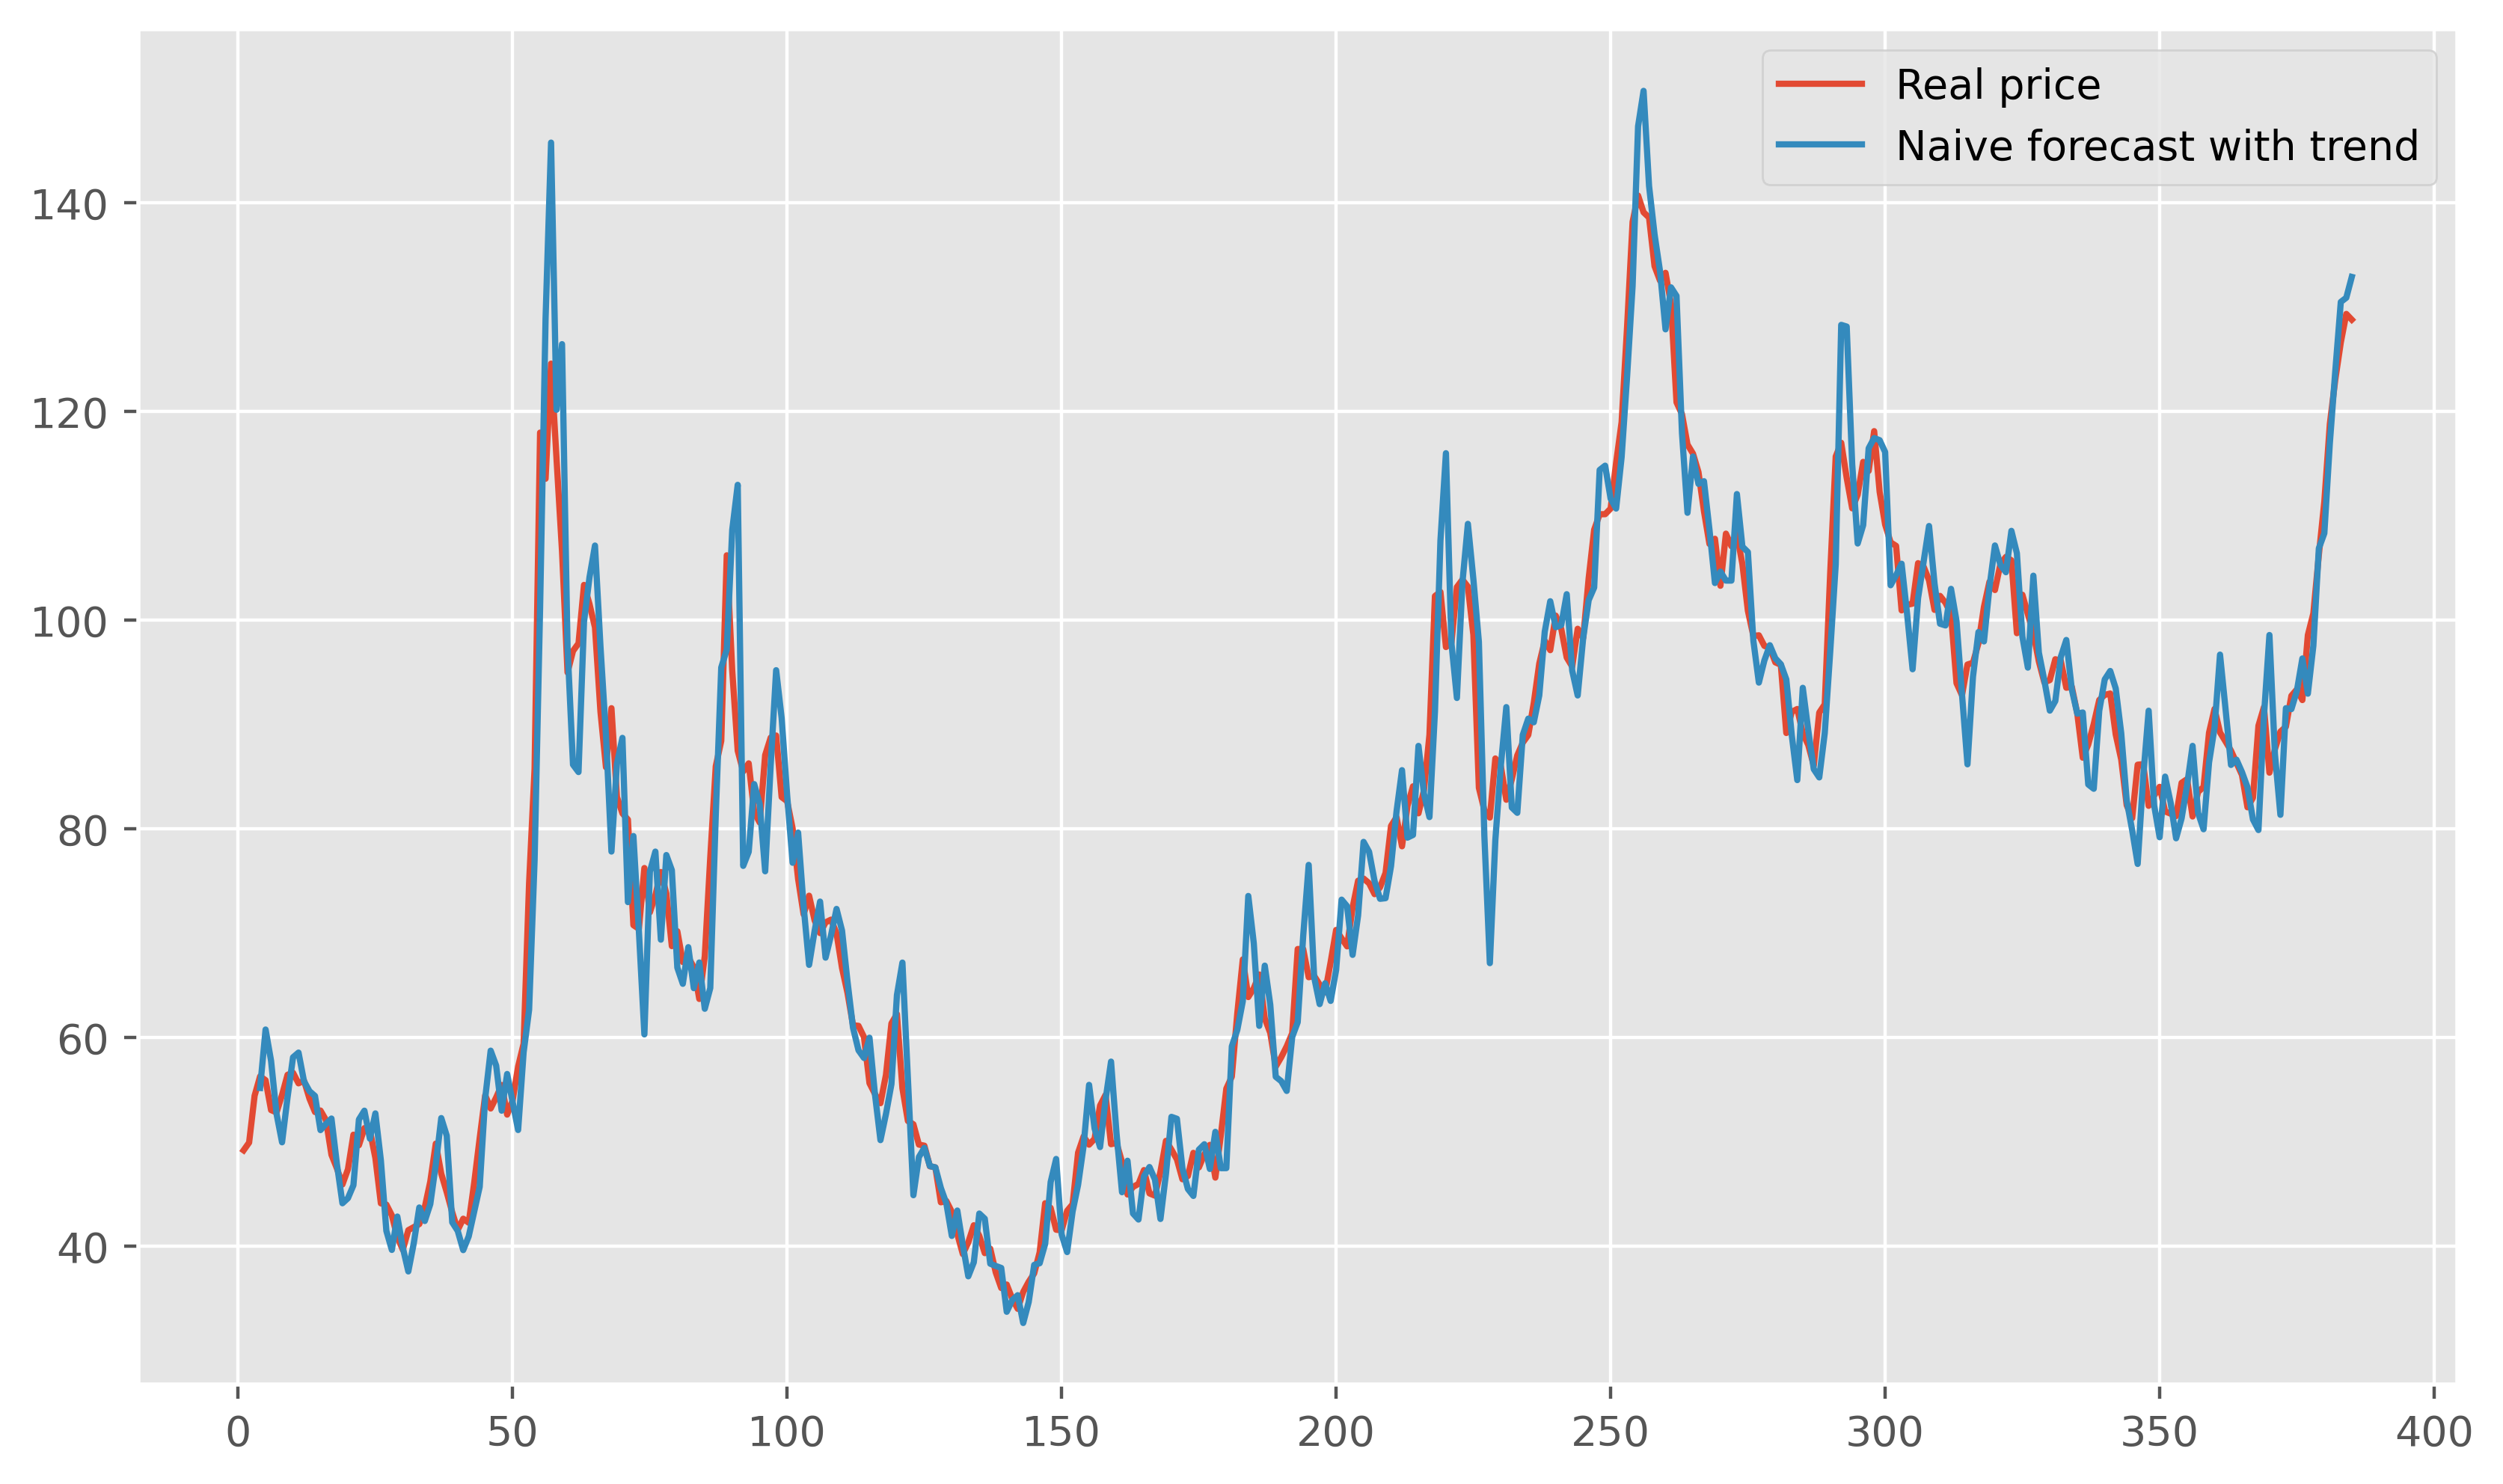

In [16]:
fig, ax = plt.subplots(figsize = (10,6), dpi = 400)
ax.plot(month, price, label = "Real price")
ax.plot(month[3:], naive_forecast_with_trend, label = "Naive forecast with trend")
ax.legend()
plt.show()

Lower and Upper Bounds for Naive Forecast with trend

In [17]:
difference = st.norm.ppf((1+confidence)/2) * RMSE(price[12:372], naive_forecast_with_trend[9:369])
naive_forecast_with_trend_lower = naive_forecast_with_trend - difference
naive_forecast_with_trend_upper = naive_forecast_with_trend + difference

In [18]:
alpha = 0.7
beta = 0.2
smoothed_trend_forecast = np.zeros(len(price))
smoothed_trend_forecast[0] = price[0]
slope = np.array([0] + [price[i] - price[i-1] for i in range(1,len(price))])
slope_hat = np.zeros(len(slope))
slope_hat[0] = slope[0]
for i in range(1, len(price)):
    smoothed_trend_forecast[i] = alpha * price[i-1] + (1-alpha) * smoothed_trend_forecast[i-1] + beta * slope[i-1] + (1-beta) * slope_hat[i-1]
    slope_hat[i] = smoothed_trend_forecast[i] - smoothed_trend_forecast[i-1]
smoothed_trend_forecast = smoothed_trend_forecast[1:]

In [19]:
print("Smoothed Trend Forecast MAE from 1991 to 2020:", MAE(price[12:372], smoothed_trend_forecast[11:371]))
print("Smoothed Trend Forecast MAPE from 1991 to 2020:", MAPE(price[12:372], smoothed_trend_forecast[11:371]))
print("Smoothed Trend Forecast RMSE from 1991 to 2020:", RMSE(price[12:372], smoothed_trend_forecast[11:371]))

Smoothed Trend Forecast MAE from 1991 to 2020: 6.157771417175611
Smoothed Trend Forecast MAPE from 1991 to 2020: 0.078055016335063
Smoothed Trend Forecast RMSE from 1991 to 2020: 8.306143226665506


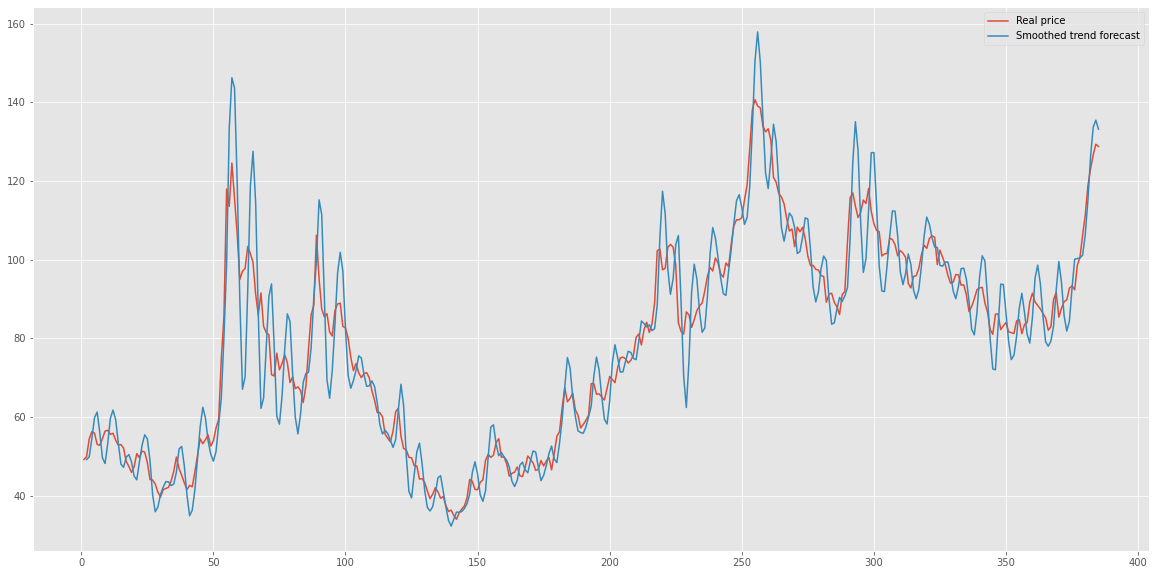

In [20]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(month, price, label = "Real price")
ax.plot(month[1:], smoothed_trend_forecast, label = "Smoothed trend forecast")
ax.legend()
plt.show()

Lower and Upper Bounds for Smoothed Trend Forecast

In [21]:
difference = st.norm.ppf((1+confidence)/2) * RMSE(price[12:372], smoothed_trend_forecast[12:372])
smoothed_trend_forecast_lower = smoothed_trend_forecast - difference
smoothed_trend_forecast_upper = smoothed_trend_forecast + difference

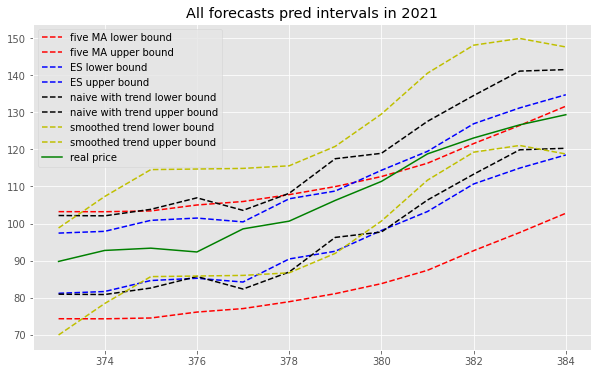

In [22]:
fig, ax = plt.subplots(figsize= (10,6))
ax.plot(month[372:384], five_ma_forecast_lower[367:379], label = "five MA lower bound", color ='r', ls = "--")
ax.plot(month[372:384], five_ma_forecast_upper[367:379], label = "five MA upper bound", color ='r', ls = "--")
ax.plot(month[372:384], es_forecast_lower[372:384], label = "ES lower bound", color ='b', ls = "--")
ax.plot(month[372:384], es_forecast_upper[372:384], label = "ES upper bound", color ='b', ls = "--")
ax.plot(month[372:384], naive_forecast_with_trend_lower[369:381], label = "naive with trend lower bound", color ='k', ls = "--")
ax.plot(month[372:384], naive_forecast_with_trend_upper[369:381], label = "naive with trend upper bound", color ='k', ls = "--")
ax.plot(month[372:384], smoothed_trend_forecast_lower[372:384], label = "smoothed trend lower bound", color ='y', ls = "--")
ax.plot(month[372:384], smoothed_trend_forecast_upper[372:384], label = "smoothed trend upper bound", color ='y', ls = "--")
ax.plot(month[372:384], price[372:384], label = "real price", color ='g')
ax.legend()
ax.set_title("All forecasts pred intervals in 2021")
plt.show()

Parameter Optimization for 6 month ahead forecast

In [23]:
six_month_ahead_RMSE = {}
k = 5
for c in range(10):
    for j in range(10):
        alpha = 0.1*(c+1)
        beta = 0.1*(j+1)
        six_month_ahead_forecast = np.zeros(len(price))
        for m in range(k+1):
            six_month_ahead_forecast[m] = price[m]
        slope = np.array([0] + [price[i] - price[i-1] for i in range(1,len(price))])
        slope_hat = np.zeros(len(slope))
        slope_hat[0] = slope[0]
        for i in range(1, len(price)+1):
            try:
                six_month_ahead_forecast[i+k] = alpha * price[i-1] + (1-alpha) * six_month_ahead_forecast[i-1] + (k+1) * (beta * slope[i-1] + (1-beta) * slope_hat[i-1])
                slope_hat[i] = six_month_ahead_forecast[i] - six_month_ahead_forecast[i-1]
            except:
                six_month_ahead_forecast = np.append(six_month_ahead_forecast, alpha * price[i-1] + (1-alpha) * six_month_ahead_forecast[i-1] + (k+1) * (beta * slope[i-1] + (1-beta) * slope_hat[i-1]))
        six_month_ahead_forecast = six_month_ahead_forecast[6:]
        six_month_ahead_RMSE[(alpha,beta)] = RMSE(price[12:372], six_month_ahead_forecast[6:366])
        
six_month_ahead_RMSE = {k: v for k, v in sorted(six_month_ahead_RMSE.items(), key=lambda item: item[1])}
alpha_star = list(six_month_ahead_RMSE.keys())[0][0]
beta_star = list(six_month_ahead_RMSE.keys())[0][1]
print("Alpha star: ", alpha_star)
print("Beta star: ", beta_star)

Alpha star:  0.8
Beta star:  1.0


In [24]:
six_month_ahead_forecast = np.zeros(len(price))
for m in range(k+1):
    six_month_ahead_forecast[m] = price[m]
slope = np.array([0] + [price[i] - price[i-1] for i in range(1,len(price))])
slope_hat = np.zeros(len(slope))
slope_hat[0] = slope[0]
for i in range(1, len(price)+1):
    try:
        six_month_ahead_forecast[i+k] = alpha_star * price[i-1] + (1-alpha_star) * six_month_ahead_forecast[i-1] + (k+1) * (beta_star * slope[i-1] + (1-beta_star) * slope_hat[i-1])
        slope_hat[i] = six_month_ahead_forecast[i] - six_month_ahead_forecast[i-1]
    except:
        six_month_ahead_forecast = np.append(six_month_ahead_forecast, alpha_star * price[i-1] + (1-alpha_star) * six_month_ahead_forecast[i-1] + (k+1) * (beta_star * slope[i-1] + (1-beta_star) * slope_hat[i-1]))
six_month_ahead_forecast = six_month_ahead_forecast[6:]



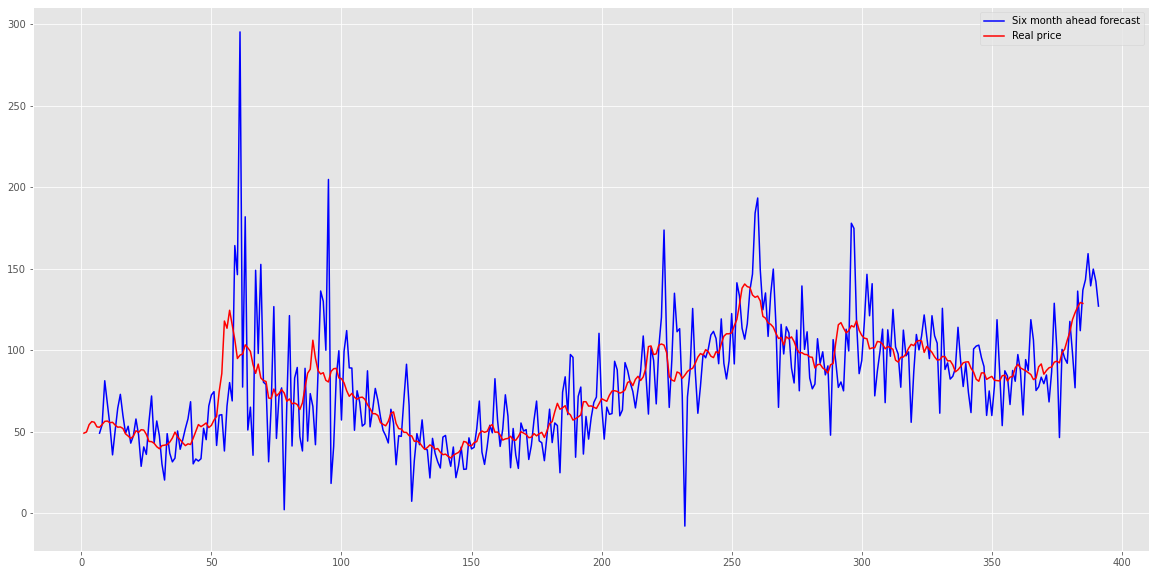

In [25]:
fig, ax = plt.subplots(figsize= (20,10))
ax.plot((month.to_list() + [386,387,388,389,390,391])[6:], six_month_ahead_forecast, label = "Six month ahead forecast", color = "blue")
ax.plot(month, price, label = "Real price", color = "red")
ax.legend()
plt.show()


Double ES Forecast Errors

In [26]:
print("6 month ahead Forecast MAE from 1991 to 2020:", MAE(price[12:372], six_month_ahead_forecast[6:366]))
print("6 month ahead Forecast MAPE from 1991 to 2020:", MAPE(price[12:372], six_month_ahead_forecast[6:366]))
print("6 month ahead Forecast RMSE from 1991 to 2020:", RMSE(price[12:372], six_month_ahead_forecast[6:366]))

6 month ahead Forecast MAE from 1991 to 2020: 18.019234087901516
6 month ahead Forecast MAPE from 1991 to 2020: 0.23371194755157096
6 month ahead Forecast RMSE from 1991 to 2020: 26.506122531366092


6-month ahead forecasts from January 2021 to June 2022

In [27]:
jan21_jun22_forecast = six_month_ahead_forecast[366:384]

In [28]:
jan21_jun22_forecast

array([ 86.93713401, 128.87048244, 100.73306085,  46.51968712,
       100.57341578,  95.23295947,  92.06726841, 117.75663314,
        98.51381085,  77.0373359 , 136.32097131, 112.05948613,
       136.95982436, 143.31809211, 159.28509029, 139.54701914,
       149.83709878, 142.25995651])

<h1>Question 2</h1>
   

Additional imports

In [29]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

500 AR-1 Generalizations

In [30]:
Y = np.zeros(500)
np.random.seed(23) ## adding a seed so that the result shouldn't change in each run
Y[0] = 50+np.random.normal(0,20)
for i in range(1,len(Y)):
    Y[i] = 50 + 0.6 * Y[i-1] + np.random.normal(0,20)

Time series plot of AR-1 Generalizations

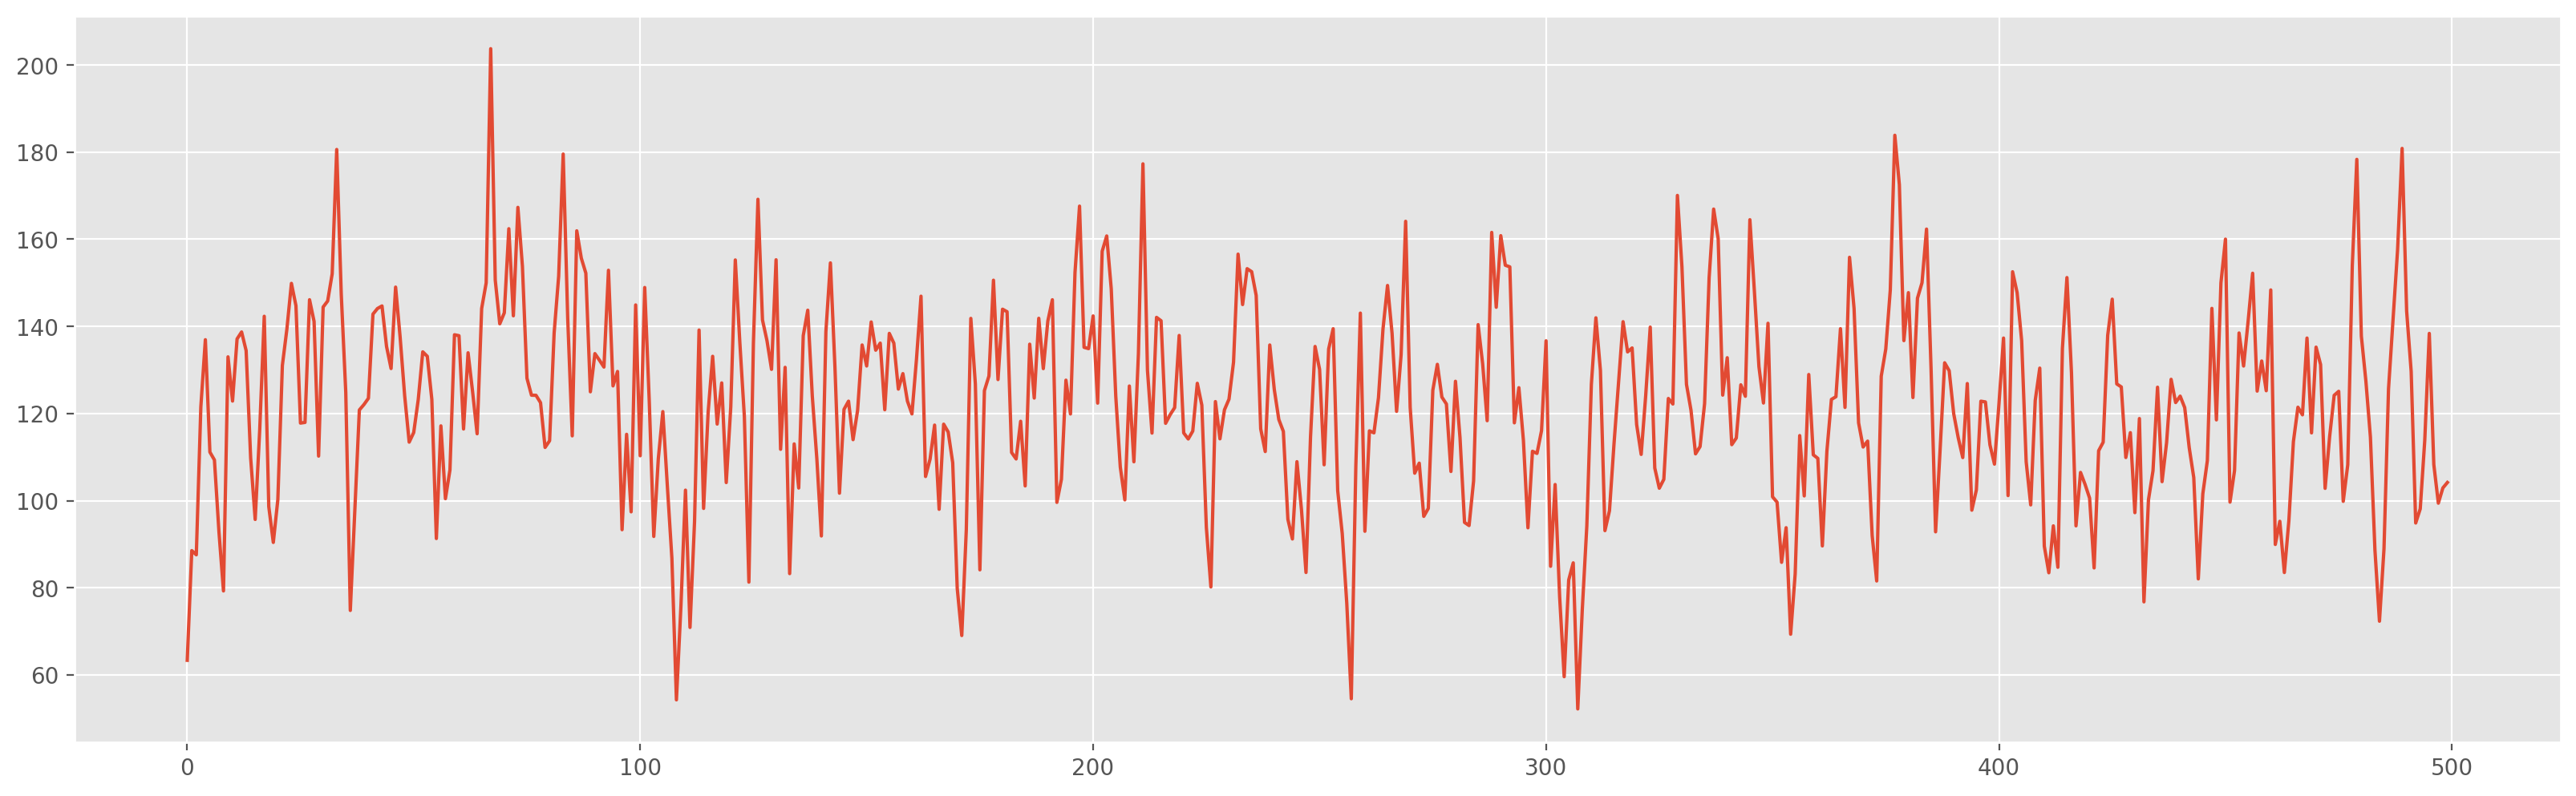

In [31]:
fig, ax = plt.subplots(figsize= (20,6), dpi = 200)
ax.plot(Y)
plt.show()

ACF plot

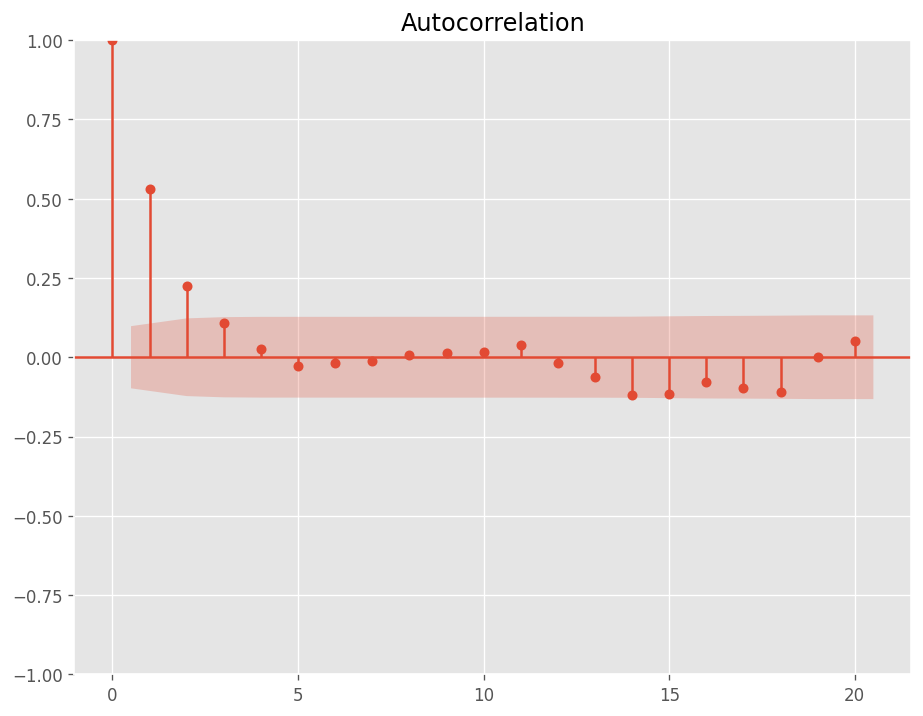

In [32]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
plot_acf(Y[100:], lags = 20)
plt.show()

RMSE function

Naive forecast and RMSE from period 100

In [33]:
naive_forecast = np.array([Y[i-1] for i in range(1,len(Y))])
print("RMSE starting from period 100:", RMSE(Y[100:], naive_forecast[99:]))

RMSE starting from period 100: 21.844471227159115


<h1>Question 3</h1>

Autocorrelation Function plot

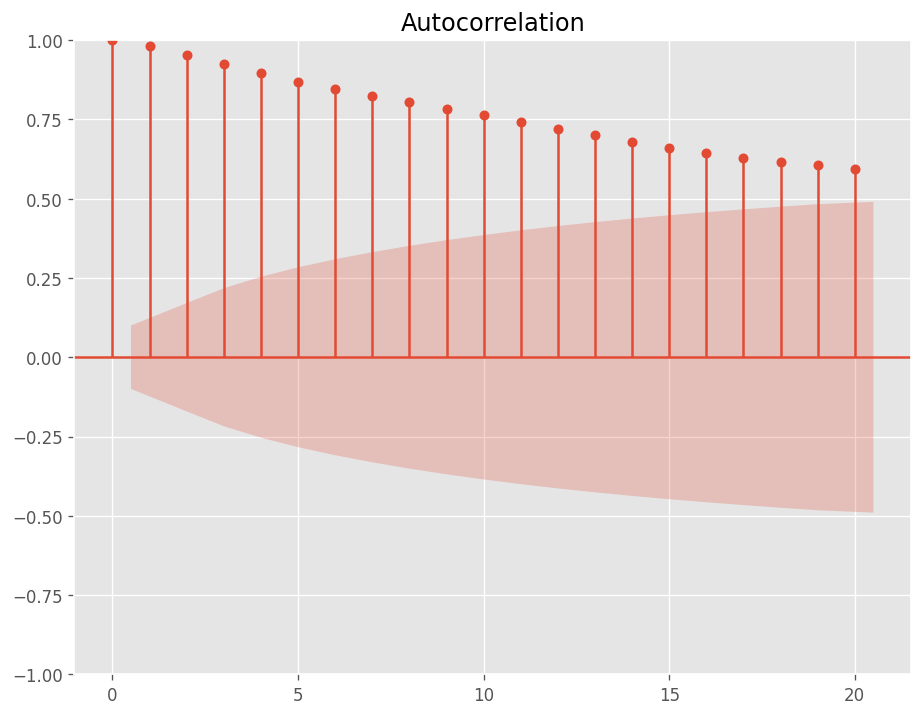

In [34]:
plot_acf(price,lags = 20)
plt.show()

Partial Autocorrelation plot

/Users/umur/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


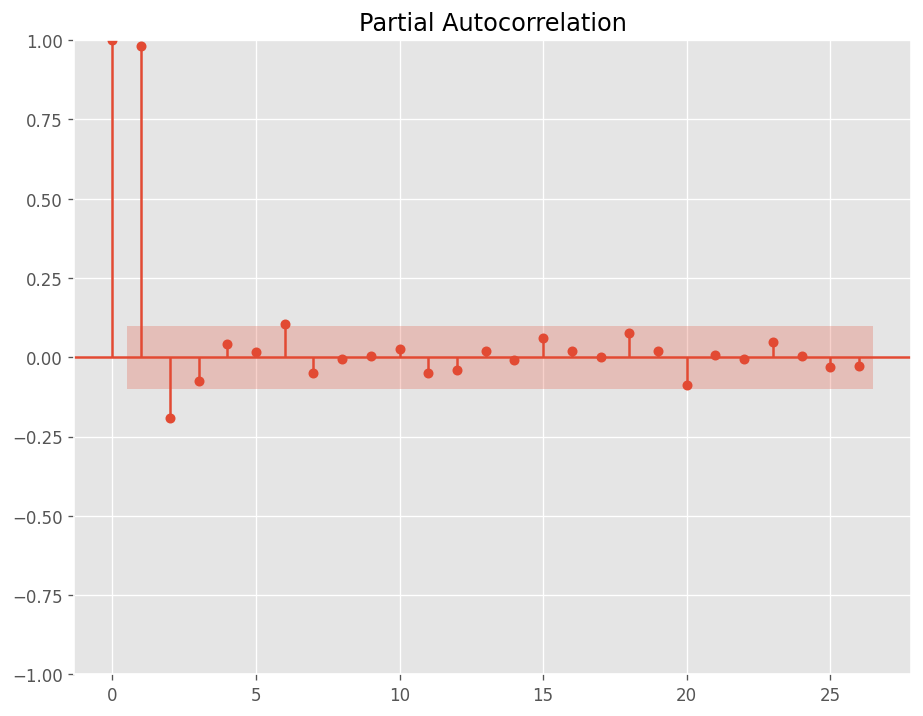

In [35]:
plot_pacf(price)
plt.show()

Difference data and ACF plot

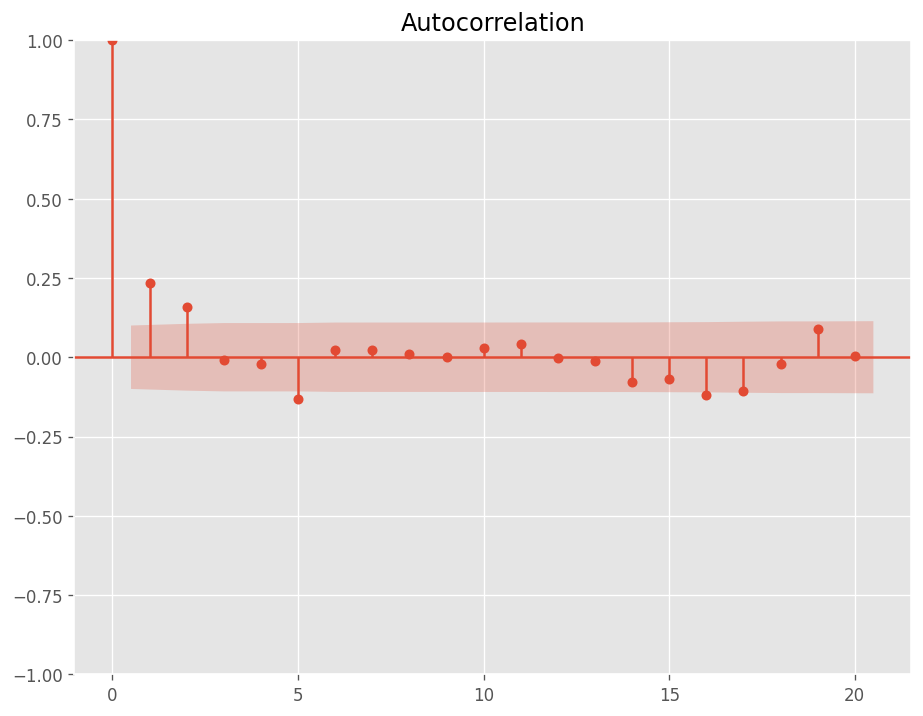

In [36]:
difference = np.array([price[i] - price[i-1] for i in range(1,len(price))])
plot_acf(difference,lags = 20)
plt.show()

PACF plot

/Users/umur/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


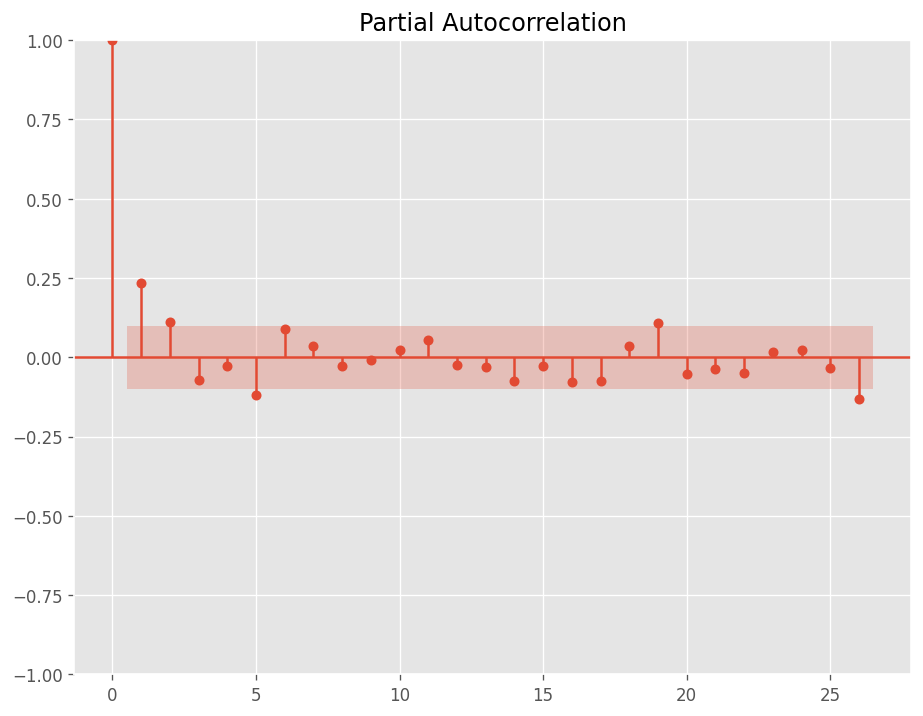

In [37]:
plot_pacf(difference)
plt.show()